In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

# Exploring HIC Counts by State ONLY 2017-2022

In [101]:
def getHICCountInfo2017to2022(state,year,Total=True,col=None):

    #just make conditionals if depending on how the year screws the stupid labels up

    if year < 2017 or year > 2022:
        print("You did not specify a correct year")
        return

    #read in excel sheet
    df = pd.read_excel("2007-2022-HIC-Counts-by-State.xlsx",sheet_name=str(year), skiprows=1)

    #get the state and total rows
    stateDF = df[df["State"] == state]
    totalDF = df[df["State"] == "Total"]

    #declare lists for plot
    labels = []
    sizes = []

    #get total year-round beds for state and total
    stateBeds = int(stateDF["Total Year-Round Beds (ES, TH, SH)"])
    totalBeds = int(totalDF["Total Year-Round Beds (ES, TH, SH)"])

    #append to list
    sizes.append(stateBeds)
    sizes.append(totalBeds)

    #append the labels
    labels.append((state + ": " + str(stateBeds)))
    labels.append(("Total: "    + str(totalBeds)))

    #get values in float and string form
    tempFloat = stateDF["HMIS Participation Rate for Year-Round Beds (ES, TH, SH)"].values[0]
    tempString = str(stateDF["HMIS Participation Rate for Year-Round Beds (ES, TH, SH)"].values[0] * 100)

    #create size and label again
    HMISLabel = []
    HMISSize = []

    #append
    HMISLabel.append(state + ": " + tempString + "%")
    HMISSize .append(int(stateDF["HMIS Participation Rate for Year-Round Beds (ES, TH, SH)"].values[0] * 100))
    HMISLabel.append("Non-participation rate: " + str(100 - (100*tempFloat)) + "%")
    HMISSize .append(int(100 - (100*tempFloat)))

    #plot the pie charts
    fig, ax = plt.subplots(3)
    ax[0].pie(sizes, labels=labels)
    ax[0].set_title((str(year) + " Total Year-Round Beds (ES, TH, SH)"))
    ax[0].plot()
    ax[1].pie(HMISSize,labels=HMISLabel)
    ax[1].set_title((str(year) + " HMIS Participation Rate for Year-Round Beds (ES, TH, SH)"))
    ax[1].plot()

    #plot a bar chart for the rest of the Total variables
    totalColumns = ["Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","Total Year-Round Beds (ES)","Total Year-Round Beds (TH)","Total Year-Round Beds (SH)","Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households without Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)","Dedicated Veteran Beds (ES, TH, SH)","Dedicated Youth Beds (ES, TH, SH)"]
    
    #try and except statement, technically don't need it
    try:
        newdf = stateDF[totalColumns]
    except KeyError as e:
        print(e.args[0])
        temp = e.args[0]
        print(temp)

    allValues = []

    #manually make labels
    totalLabels = ["Non-DV Year-Round","HMIS Year-Round Beds","Year-Round Beds (ES)","Year-Round Beds (TH)","Year-Round Beds (SH)","Units for Households w/ Children","Total Beds for Households w/ Children","Beds for Households w/o Children","Total Beds for Households w/only Children","Dedicated Veteran Beds","Dedicated Youth Beds"]

    #get all the values
    for i in totalColumns:
        allValues.append(newdf[i].values[0])

    #plot a horizontal bar graph
    bars = ax[2].barh(totalLabels,allValues)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax[2].set_title(str(year) + " TN"+" Total Beds Per Category")
    ax[2].bar_label(bars)
    ax[2].plot()

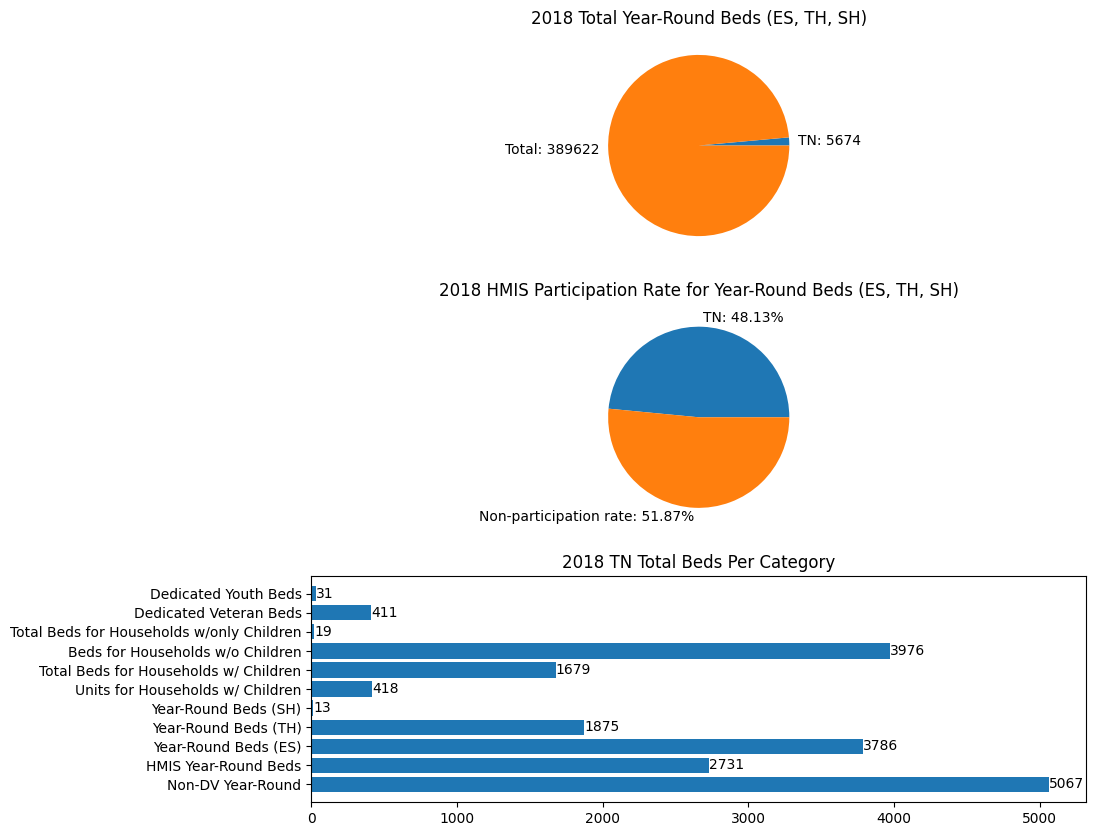

In [103]:
getHICCountInfo2017to2022("TN",2018,True)

# Exploring HIC Counts by State Hopefully 2007-2016

# Exploring PIT Counts by State